In [1]:
import json
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:

con = sqlite3.connect('../data/interim/articles_with_author_mapping.db')
cur = con.cursor()


In [8]:
cur.execute("select name, abbreviation from authors where abbreviation is not null limit 100")
rows = cur.fetchall()
authors = pd.DataFrame(columns=["name", "abbreviation"], data=rows)

In [9]:
# remove duplicates
authors = authors.drop_duplicates()
authors

,name,abbreviation
0,Kai-Uwe Brandt,kub
1,Nadja Topfstedt,jap
2,Manfred Lüttich,maf
3,Heiko Trebs,ht
4,Andreas Tappert,art
6,Annett Riedel,ar
7,Andreas Tappert,ast
8,lvz,lvz
9,Nadja Topfstedt,nt
15,Antje Henselin-Rudolph,ahr


In [10]:
# remove self referencing nodes
authors = authors[authors["name"] != authors["abbreviation"]]

In [11]:
# add name and abbreviation as nodes list and remove duplicates
nodes = list(authors["name"].unique()) + list(authors["abbreviation"].unique())

# add unique edges based on entries in the authors table
edges = []
for index, row in authors.iterrows():
    edges.append((row["name"], row["abbreviation"]))

In [12]:
G = nx.Graph()
G.add_nodes_from(list(authors["name"].unique()), bipartite=0)
G.add_nodes_from(list(authors["abbreviation"].unique()), bipartite=1)
G.add_edges_from(edges)

In [13]:
print(f"number of nodes: {G.number_of_nodes()}, number of edges: {G.number_of_edges()}")

number of nodes: 48, number of edges: 26


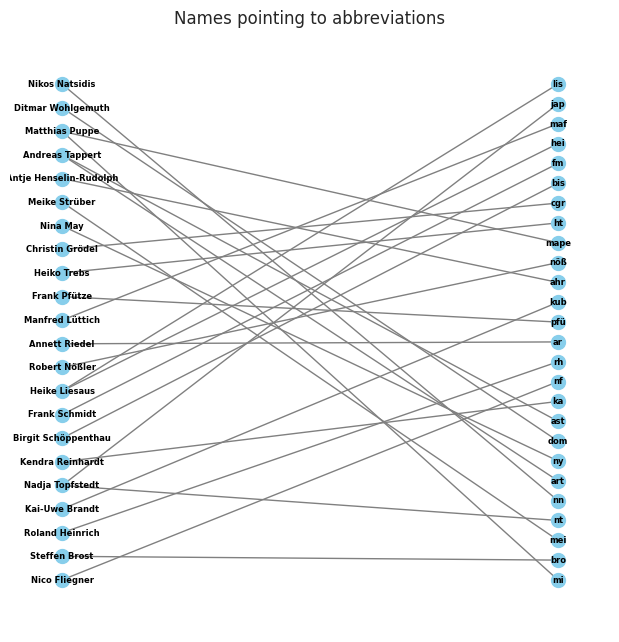

In [14]:
# Draw the graph
pos = nx.bipartite_layout(G, list(authors["name"].unique()))
plt.figure(figsize=[6, 6])
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')
plt.title('Names pointing to abbreviations')
plt.savefig('../reports/figures/names_to_abbreviations.png', dpi=300)